In [1]:
from IPython.display import Image

# <font color="brown">01. 로지스틱 회귀(Logistic Regression)</font>

---

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많다.

예를 들어, 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇다.

이렇게 둘 중 하나를 결정하는 문제를 **이진 분류(Binary Classification)** 라고 한다.

그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.

## <font color="orange">1. 이진 분류(Binary Classification)</font>

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해보도록 하자.

시험 성적이 $x$라면, 합불 결과는 $y$이다.

이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 한다.

|Score($x$)|Result($y$)|
|-----|-----|
|45|불합격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

위의 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같다.

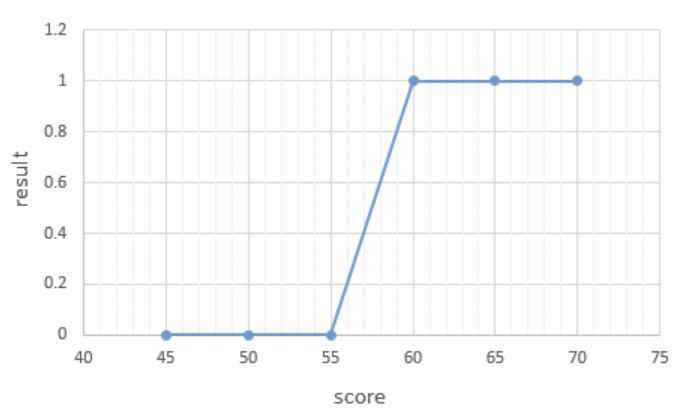

In [2]:
Image("./Images/이진분류.png", width = 500, height = 400)

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현된다.

이러한 $x$와 $y$의 관계를 표현하기 위해서는 $Wx + b$와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요하다.

이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않는다.<br><br>

그래서 이번 로지스틱 회귀의 가설은 선형 회귀 때의 $H(x) = Wx + b$가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정함수 $f$를 추가적으로 사용하여 $H(x) = f(Wx + b)$의 가설을 사용할 것이다.

그리고 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 $f$는 `시그모이드` 함수이다.

## <font color="orange">2. 시그모이드 함수(Sigmoid function)</font>

위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같다.

$$H(x) = sigmoid(Wx + b) = \frac{1}{1+e^{-(Wx + b)}} = \sigma(Wx + b)$$

선형 회귀에서는 최적의 $W$와 $b$를 찾는 것이 목표였으며, 여기서도 마찬가지이다.

선형 회귀에서는 $W$가 직선의 기울기, $b$가 $y$절편을 의미한다.

그렇다면 여기에서는 $W$와 $b$가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그려서 알아보도록 하자.

In [3]:
# 필요 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 1) $W$가 1이고, $b$가 0인 그래프

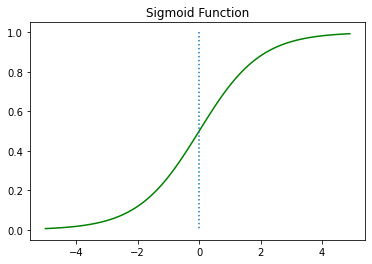

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, "g")
plt.plot([0, 0], [1.0, 0.0], ":") # 가운데 점선 추가
plt.title("Sigmoid Function")
plt.show()

### 2) $W$값의 변화에 따른 경사도의 변화

이제 $W$의 값을 변화시키고 이에 다른 그래프를 확인해보도록 하자.

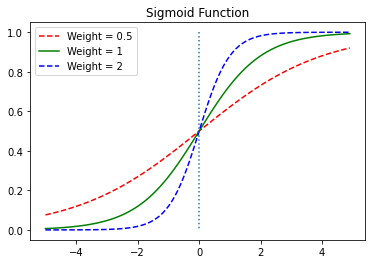

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, "r", linestyle = "--", label = "Weight = 0.5")
plt.plot(x, y2, "g", label = "Weight = 1")
plt.plot(x, y3, "b", linestyle = "--", label = "Weight = 2")
plt.plot([0, 0], [1, 0], ":")
plt.title("Sigmoid Function")
plt.legend()
plt.show()

위의 그림을 보면 $W$의 값에 따라 **그래프의 경사도**가 변하는 것을 볼 수 있다.

앞서 선형 회귀에서 가중치 $W$는 직선의 기울기를 의미했지만, 여기서는 `그래프의 경사도`를 결정한다.

**$W$의 값이 커지면 경사가 커지고, $W$의 값이 작아지면 경사가 작아진다.**

### 3) $b$값의 변화에 따른 좌, 우 이동

이제 $b$의 값에 따라서 그래프가 어떻게 변하는지 확인해보도록 하자.

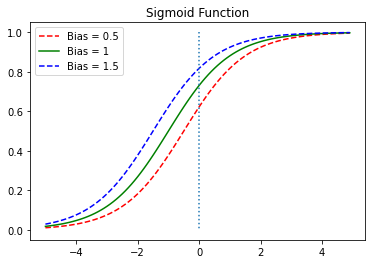

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, "r", linestyle = "--", label = "Bias = 0.5")
plt.plot(x, y2, "g", label = "Bias = 1")
plt.plot(x, y3, "b", linestyle = "--", label = "Bias = 1.5")
plt.plot([0, 0], [1, 0], ":")
plt.title("Sigmoid Function")
plt.legend()
plt.show()

위의 그래프는 $b$의 값에 따라서 그래프가 좌, 우로 이동하는 것을 보여준다.

### 4) 시그모이드 함수를 이용한 분류

시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴한다.

**즉, 시그모이드 함수의 출력값은 0과 1사이의 값을 가지는데** 이 특성을 이용하면 분류 작업에 사용할 수 있다.

예를 들어, 임계값을 0.5라고 정해보도록 하자.

출력값이 0.5 이상이면 1(True), 0.5 이하이면 0(False)으로 판단하도록 할 수 있다.

이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블에 속할 확률이 50%보다 낮으면 아니라고 판단하는 것으로 볼 수 있다.

## <font color="orange">3. 비용 함수(Cost function)</font>

이제 로지스틱 회귀의 가설이 $H(x) = sigmoid(Wx + b)$인 것을 알았다.

이제 최적의 $W$와 $b$를 찾을 수 있는 비용 함수를 정의해야 한다.

앞서 선형 회귀에서 사용한 평균제곱오차(MSE: Mean Square Error)를 로지스틱 회귀의 비용 함수로 사용하면 안되는 것일까?<br><br>

다음은 선형 회귀에서 사용했던 평균제곱오차의 수식이다.

$$cost(W, b) = \frac{1}{n}\sum_{i=1}^n [y^{(i)} - H(x^{(i)})]^2$$

위의 비용 함수 수식에서 가설은 이제 $H(x) = Wx + b$가 아니라 $H(x) = sigmoid(Wx + b)$이다.

그리고 이 비용 함수를 미분하면 선형 회귀때와 달리 아래의 그림과 유사한 심한 비볼록(non-convex) 형태의 그래프가 나온다.

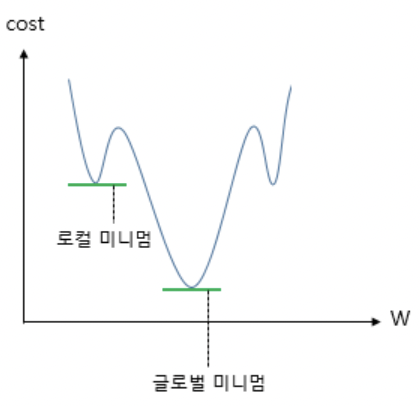

In [8]:
Image("./Images/로지스틱 비용함수1.png", width = 300, height = 300)

위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 오나전히 최소값이 되는 구간이 아닐 수도 있다는 점이다.

사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있다.

하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 내려가야 할 것이다.

모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 한다.

만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 $W$가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않는다.<br><br>

**이를 전체 함수에 걸쳐 최소값인 Global Minimum이 아닌 특정 구역에서의 최소값인 Local Minimum에 도달했다고 한다.**

이는 $cost$가 최소가 되는 가중치 $W$를 찾는다는 비용 함수의 목적에 맞지 않는다.<br><br>

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점이다.

즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때 예측값이 1에 가까워지면 오차가 커져야 한다.

그리고 이를 충족하는 함수가 바로 로그 함수이다.

다음은 $y = 0.5$에 대칭하는 두 개의 로그 함수 그래프이다.

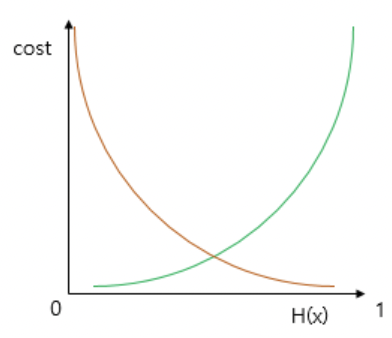

In [9]:
Image("./Images/로지스틱 비용함수2.png", width = 300, height = 300)

실제값이 1일 때의 그래프를 **주황색 선**으로 표현하였으며, 실제값이 0일 때의 그래프를 **초록색 선**으로 표현하였다.

실제값이 1이라고 가정해보도록 하자.

이 경우, 예측값인 $H(x)$의 값이 1이면 오차가 0이므로 당연히 $cost$는 0이 된다.

반면, $H(x)$가 0으로 수렴하면 $cost$는 무한대로 발산한다.

실제값이 0인 경우는 그 반대로 이해하면 된다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같다.

$$if\quad y = 1 \to cost(H(x), y) = -log(H(x))$$

$$if\quad y = 0 \to cost(H(x), y) = -log(1 - H(x))$$

이는 아래와 같이 하나의 식으로 통합할 수 있다.

$$cost(H(x), y) = -[ylogH(x) + (1 - y)log(1 - H(x))]$$

왜 위 식이 두 개의 식을 통합한 식이라고 볼 수 있을까?

실제값 $y$가 1이라고 하면 덧셈 기호를 기준으로 우측의 항이 없어진다.

반대로 실제값 $y$가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어진다.

선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했었다.

마찬가지로 여기에서도 모든 오차의 평균을 구하면 된다.

$$cost(W) = -\frac{1}{n}\sum_{i=1}^n [y^{(i)}logH(x^{(i)}) + (1 - y^{(i)})log(1 - H(x^{(i)}))]$$

정리마면, 위 비용 함수의 실제값 $y$와 예측값 $H(x)$의 차이가 커지면 $cost$가 커지고, 실제값 $y$와 예측값 $H(x)$의 차이가 작아지면 $cost$는 작아진다.

이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 $W$를 찾아간다.

$$W := W - \alpha\frac{\partial}{\partial W}cost(W)$$

## <font color="orange">4. 파이토치로 로지스틱 회귀 구현하기</font>

이제 파이토치로 로지스틱 회귀 중에서도 다수의 $x$로부터 $y$를 예측하는 다중 로지스틱 회귀를 구현해보도록 하자.

In [10]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
torch.manual_seed(1)

In [12]:
# 훈련 데이터 생성
x_train = torch.FloatTensor([[1, 2],
                             [2, 3],
                             [3, 1],
                             [4, 3],
                             [5, 3],
                             [6, 2]])

y_train = torch.FloatTensor([[0],
                             [0],
                             [0],
                             [1],
                             [1],
                             [1]])

print("Shape of x_train :", x_train.shape, "\n")
print("Shape of y_train :", y_train.shape)

Shape of x_train : torch.Size([6, 2]) 

Shape of y_train : torch.Size([6, 1])


현재 x_train은 6 $\times$ 2의 크기를 가지는 행렬이며, y_train은 6 $\times$ 1의 크기를 가지는 벡터이다.

x_train을 $X$라 하고, 이와 곱해지는 가중치 벡터를 $W$라고 하였을 때, $XW$가 성립되기 위해서 $W$ 벡터의 크기는 2 $\times$ 1 이어야 한다.

In [13]:
# 가충치와 편향 생성
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

이제 가설을 세워보도록 하자.

파이토치에서 $e^x$를 구현하기 위해서 `torch.exp(x)`를 사용한다.

이에 따라 행렬 연산을 사용한 가설은 다음과 같다.

In [14]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

$W$와 $b$는 전부 0으로 초기화 된 상태이다.

이 상태에서 예측값을 출력해보도록 하자.

In [15]:
print(hypothesis.detach())

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])


실제값 y_train과 크기가 동일한 6 $\times$ 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5이다.<br><br>

사실 가설을 조금 더 간단하게 구현할 수 있다.

파이토치에서는 시그모이드 함수를 `torch.sigmoid()`로 이미 구현하여 제공하고 있다.

In [16]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis.detach())

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])


이제 아래의 비용 함수값. 즉, 현재 예측값과 실제값 사이의 $cost$를 구해보도록 하자.

$cost(W) = -\frac{1}{n}\sum_{i=1}^n [y^{(i)}logH(x^{(i)}) + (1 - y^{(i)})log(1 - H(x^{(i)}))]$

In [17]:
# 모든 원소에 대해서 오차 구하기
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

# 전체 오차에 대한 평균 구하기
cost = losses.mean()
print("Cost :", cost)

Cost : tensor(0.6931, grad_fn=<MeanBackward0>)


결과적으로 얻은 $cost$는 0.6931이다.<br><br>

지금까지 비용 함수의 값을 직접 구현하였는데, 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고 있다.

사용 방법은 `torch.nn.functional.binary_cross_entropy(예측값, 실제값)`이다.

In [18]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

동일하게 $cost$가 0.6931이 출력되는 것을 볼 수 있다.

모델의 훈련 과정까지 추가한 전체 코드는 아래와 같다.

In [19]:
# 훈련 데이터 생성
x_train = torch.FloatTensor([[1, 2],
                             [2, 3],
                             [3, 1],
                             [4, 3],
                             [5, 3],
                             [6, 2]])

y_train = torch.FloatTensor([[0],
                             [0],
                             [0],
                             [1],
                             [1],
                             [1]])

# 가중치 편항 생성
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # H(x), Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost : 0.693147
Epoch  100/1000 Cost : 0.134722
Epoch  200/1000 Cost : 0.080643
Epoch  300/1000 Cost : 0.057900
Epoch  400/1000 Cost : 0.045300
Epoch  500/1000 Cost : 0.037261
Epoch  600/1000 Cost : 0.031673
Epoch  700/1000 Cost : 0.027556
Epoch  800/1000 Cost : 0.024394
Epoch  900/1000 Cost : 0.021888
Epoch 1000/1000 Cost : 0.019852


이제 훈련했던 데이터를 그대로 입력으로 사용했을 때, 제대로 예측하는지 확인해보도록 하자.

현재 $W$와 $b$는 훈련을 마친 후의 값을 가지고 있다.

In [20]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis.detach())

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]])


현재 위 값들은 0과 1 사이의 값을 가지고 있다.

이제 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력해보도록 하자.

In [21]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


실제값은 [[0], [0], [0], [1], [1], [1]]이므로, 이는 결과적으로 False, False, False, True, True, True와 동일하다.

즉, 기존의 실제값과 동일하게 예측한 것을 확인할 수 있다.

# <font color="brown">02. nn.Module로 구현하는 로지스틱 회귀</font>

앞의 내용을 잠깐 복습해보면 선형 회귀 모델의 가설은 $H(x) = Wx + b$이었다.

그리고 이 가설을 구현하기 위해서 파이토치의 `nn.Linear()`을 사용하였다.

반면, 로지스틱 회귀의 가설은 $H(x) = sigmoid(Wx + b)$이다.

파이토치에서는 `nn.Sigmoid()`를 통해서 시그모이드 함수를 구현하므로 결과적으로 `nn.Linear()`의 결과를 `nn.Sigmoid()`를 거치게 하면 로지스틱 회귀의 가설이 된다.

## <font color="orange">1. 파이토치의 nn.Linear과 nn.Sigmoid로 로지스틱 회귀 구현하기</font>

In [40]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [41]:
torch.manual_seed(1)

In [47]:
# 데이터 생성
x_train = torch.FloatTensor([[1, 2],
                             [2, 3],
                             [3, 1],
                             [4, 3],
                             [5, 3],
                             [6, 2]])

y_train = torch.FloatTensor([[0],
                             [0],
                             [0],
                             [1],
                             [1],
                             [1]])

`nn.Sequential()`은 `nn.Module` 층을 차례로 쌓을 수 있도록 한다.

조금 쉽게 말해서 **nn.Sequential()** 은 $Wx + b$와 같은 수식과 시그모이드 함수 등과 같은 여러 함수들을 연결해주는 역할을 한다.

In [48]:
# 로지스틱 회귀 모델 생성
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

현재 $W$와 $b$는 랜덤 초기화가 된 상태이다.

훈련 데이터를 넣어 예측값을 출력해보도록 한다.

In [49]:
print(model(x_train).detach())

tensor([[0.3600],
        [0.2872],
        [0.6801],
        [0.4389],
        [0.5216],
        [0.7473]])


6 $\times$ 1 크기의 예측값 텐서가 출력된다.

그러나 현재 $W$와 $b$는ㄴ 임의의 값을 가지므로 현재의 예측은 큰 의미가 없다.

이제 경사 하강법을 사용하여 훈련해보도록 하자.

In [50]:
# Optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

# 1,000번의 에포크 수행
nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = model(x_train)
    
    # Cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        
        # 예측값이 0.5 이상인 경우는 True, 그렇지 않으면 False
        prediction = hypothesis >= torch.FloatTensor([0.5])
        
        # 실제값과 일치하는 경우에는 True, 그렇지 않으면 False
        correct_prediction = prediction.float() == y_train
        
        # 정확도 계산
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        
        print("Epoch {:4d}/{} Cost : {:.6f}, Accuracy {:2.2f}%".format(epoch, nb_epochs, cost.item(), accuracy * 100))

Epoch    0/1000 Cost : 0.614994, Accuracy 66.67%
Epoch   10/1000 Cost : 0.747550, Accuracy 83.33%
Epoch   20/1000 Cost : 0.633216, Accuracy 83.33%
Epoch   30/1000 Cost : 0.538123, Accuracy 83.33%
Epoch   40/1000 Cost : 0.450406, Accuracy 83.33%
Epoch   50/1000 Cost : 0.366382, Accuracy 83.33%
Epoch   60/1000 Cost : 0.287368, Accuracy 83.33%
Epoch   70/1000 Cost : 0.219288, Accuracy 83.33%
Epoch   80/1000 Cost : 0.173225, Accuracy 100.00%
Epoch   90/1000 Cost : 0.151674, Accuracy 100.00%
Epoch  100/1000 Cost : 0.140280, Accuracy 100.00%
Epoch  110/1000 Cost : 0.131002, Accuracy 100.00%
Epoch  120/1000 Cost : 0.122903, Accuracy 100.00%
Epoch  130/1000 Cost : 0.115765, Accuracy 100.00%
Epoch  140/1000 Cost : 0.109426, Accuracy 100.00%
Epoch  150/1000 Cost : 0.103760, Accuracy 100.00%
Epoch  160/1000 Cost : 0.098664, Accuracy 100.00%
Epoch  170/1000 Cost : 0.094056, Accuracy 100.00%
Epoch  180/1000 Cost : 0.089870, Accuracy 100.00%
Epoch  190/1000 Cost : 0.086050, Accuracy 100.00%
Epoch  2

위의 결과를 보면, 중간부터 정확도가 100% 임을 확인할 수 있다.

기존의 훈련 데이터를 입력하여 예측값을 확인해보도록 하자.

In [54]:
print((model(x_train) >= torch.FloatTensor([0.5])).squeeze())

tensor([False, False, False,  True,  True,  True])


0.5 이상인 경우에는 True, 그렇지 않으면 False로 지정하도록 한다.

실제값은 [[0], [0], [0], [1], [1], [1]] 이다.

이는 False, False, False, True, True, True에 해당되므로 전부 실제값과 일치하도록 에측한 것을 확인할 수 있다.<br><br>

훈련 후의 $W$와 $b$의 값을 출력해보도록 하자.

In [58]:
print("Weight :", list(model.parameters())[0].detach(), "\n")
print("Bias :", list(model.parameters())[1].detach(), "\n")
print(list(model.parameters()))

Weight : tensor([[3.2477, 1.5151]]) 

Bias : tensor([-14.4576]) 

[Parameter containing:
tensor([[3.2477, 1.5151]], requires_grad=True), Parameter containing:
tensor([-14.4576], requires_grad=True)]


## <font color="orange">2. 인공 신경망으로 표현되는 로지스틱 회귀</font>

사실 로지스틱 회귀는 인공 신경망으로 간주할 수 있다.

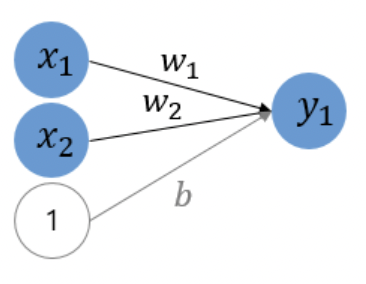

In [61]:
Image("./Images/인공신경망 로지스틱.png", width = 200)

위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 **가중치** 또는 **편향**이다.

각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향이 곱해진다.

각 입력 $x$는 각 입력의 가중치 $w$와 곱해지고, 편향 $b$는 상수 1과 곱해지는 것으로 표현되었다.

그리고 출력하기 전에 시그모이드 함수를 지나게 된다.<br><br>

결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고 있다.

$H(x) = sigmoid(x_1w_1 + x_2w_2 + b)$

# <font color="brown">03. 클래스로 파이토치 모델 구현하기</font>

---

파이토치 대부분의 구현체들은 대부분 모델을 생성할 때 클래스(Class)를 사용하고 있다.

앞서 배운 로지스틱 회귀를 클래스로 구현해보도록 하자.

## <font color="orange">1. 모델을 클래스로 구현하기</font>

앞서 로지스틱 회귀 모델은 다음과 같이 구현하였다.

```python
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
```

이를 클래스로 구현하면 다음과 같다.

In [62]:
class BinaryClassifier(nn.Module):
    
    # 모델의 구조와 동작을 정의
    def __init__(self):
        
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
        
    # 예측값을 반환하는 'forward 연산' 정의
    def forward(self, x):
        
        return self.sigmoid(self.linear(x))

위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지해야 한다.<br><br>

클래스 형태의 모델은 `nn.Module`을 상속받는다.

그리고 `__init__()`에서 모델의 구조와 동작을 정의하는 생성자를 정의한다.

이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.

`super()` 함수를 부르면 여기서 만든 클래스는 **nn.Module** 클래스의 속성들을 가지고 초기화 된다.

`forward()` 함수는 모델이 학습데이터를 입력받아서 **forward 연산**을 진행시키는 함수이다.

이 **forward()** 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이 된다.

예를 들어, model이란 객체를 생성 후, **model(입력 데이터)** 와 같은 형식으로 객체를 호출하면 자동으로 **forward 연산**이 수행된다.

- $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 **forward 연산**이라고 한다.

## <font color="orange">2. 로지스틱 회귀 클래스로 구현하기</font>

In [64]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
torch.manual_seed(1)

In [66]:
# 데이터 생성
x_train = torch.FloatTensor([[1, 2],
                             [2, 3],
                             [3, 1],
                             [4, 3],
                             [5, 3],
                             [6, 2]])

y_train = torch.FloatTensor([[0],
                             [0],
                             [0],
                             [1],
                             [1],
                             [1]])

In [67]:
# 클래스로 로지스틱 회귀 구현하기
class BinaryClassifier(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        
        return self.sigmoid(self.linear(x))

In [68]:
# 모델 객체 생성
model = BinaryClassifier()

In [70]:
# Optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = model(x_train)
    
    # Cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 20 == 0:
        
        # 예측값이 0.5를 넘으면 True
        prediction = hypothesis >= torch.FloatTensor([0.5])
        
        # 실제값과 일치하는 경우만 True
        correct_prediction = prediction.float() == y_train
        
        # 정확도 계산
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        
        print("Epoch {:4d}/{} Cost : {:.6f}, Accuracy : {:2.2f}%".format(epoch, nb_epochs, cost.item(), accuracy * 100))

Epoch    0/1000 Cost : 0.527002, Accuracy : 83.33%
Epoch   20/1000 Cost : 0.570399, Accuracy : 83.33%
Epoch   40/1000 Cost : 0.388606, Accuracy : 83.33%
Epoch   60/1000 Cost : 0.235923, Accuracy : 83.33%
Epoch   80/1000 Cost : 0.155795, Accuracy : 100.00%
Epoch  100/1000 Cost : 0.133369, Accuracy : 100.00%
Epoch  120/1000 Cost : 0.117600, Accuracy : 100.00%
Epoch  140/1000 Cost : 0.105223, Accuracy : 100.00%
Epoch  160/1000 Cost : 0.095251, Accuracy : 100.00%
Epoch  180/1000 Cost : 0.087044, Accuracy : 100.00%
Epoch  200/1000 Cost : 0.080169, Accuracy : 100.00%
Epoch  220/1000 Cost : 0.074323, Accuracy : 100.00%
Epoch  240/1000 Cost : 0.069291, Accuracy : 100.00%
Epoch  260/1000 Cost : 0.064912, Accuracy : 100.00%
Epoch  280/1000 Cost : 0.061066, Accuracy : 100.00%
Epoch  300/1000 Cost : 0.057659, Accuracy : 100.00%
Epoch  320/1000 Cost : 0.054620, Accuracy : 100.00%
Epoch  340/1000 Cost : 0.051892, Accuracy : 100.00%
Epoch  360/1000 Cost : 0.049428, Accuracy : 100.00%
Epoch  380/1000 

# <font color="brown">References</font>

---

- [PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/book/2788)